## Two-way anova test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

In [9]:
df = pd.DataFrame({'water':np.repeat(['daily','weekly'],15),
   
                  'sun':np.tile(np.repeat(["low","medium","high"],5),2),
                   'height':[6,7,8,9,0,2,3,4,5,6,
                   1,7,3,4,0,3,23,9,11,7,
                   1,77,6,4,23,1,2,5,6,9,
                   
                             
                   ]



})

In [10]:
df

,water,sun,height
0,daily,low,6
1,daily,low,7
2,daily,low,8
3,daily,low,9
4,daily,low,0
5,daily,medium,2
6,daily,medium,3
7,daily,medium,4
8,daily,medium,5
9,daily,medium,6


c:\Users\Biscode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

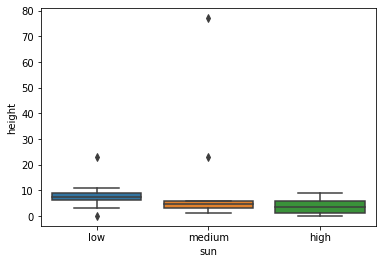

In [11]:
import seaborn as sns
sns.boxplot(df['sun'],df['height'])

c:\Users\Biscode\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

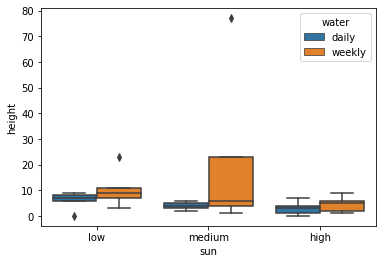

In [13]:
sns.boxplot(df['sun'],df['height'],hue=df['water'])

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols



In [21]:
## one - way anova
mod = ols('height ~ sun',data = df).fit()
aov_table = sm.stats.anova_lm(mod,type=2) 

In [22]:
print(aov_table)

            df  sum_sq     mean_sq         F    PR(>F)
sun        2.0   432.6  216.300000  1.103446  0.346225
Residual  27.0  5292.6  196.022222       NaN       NaN


In [26]:
## Two - way anova
mod = ols('height ~ C(sun)+ C(water) + C(sun):C(water)',data = df).fit()
aov_table = sm.stats.anova_lm(mod,type=2) 

In [27]:
print(aov_table)

                   df       sum_sq     mean_sq         F    PR(>F)
C(sun)            2.0   432.600000  216.300000  1.178425  0.324947
C(water)          1.0   496.133333  496.133333  2.702987  0.113198
C(sun):C(water)   2.0   391.266667  195.633333  1.065831  0.360189
Residual         24.0  4405.200000  183.550000       NaN       NaN


In [28]:
# another way of doing two way anova
import pingouin as pg
aov = pg.anova(data= df,dv= 'height',between=["sun","water"],detailed=True)

In [29]:
print(aov)

        Source           SS  DF          MS         F     p-unc       np2
0          sun   432.600000   2  216.300000  1.178425  0.324947  0.089421
1        water   496.133333   1  496.133333  2.702987  0.113198  0.101224
2  sun * water   391.266667   2  195.633333  1.065831  0.360189  0.081574
3     Residual  4405.200000  24  183.550000       NaN       NaN       NaN


In [30]:
## tukey test on two way anova


In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['height'],df['sun'])
mcresult = mc.tukeyhsd(0.05)
mcresult.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
high,low,4.5,0.7547,-11.0245,20.0245,False
high,medium,9.3,0.3136,-6.2245,24.8245,False
low,medium,4.8,0.7263,-10.7245,20.3245,False


In [32]:
mc = MultiComparison(df['height'],df['water'])
mcresult = mc.tukeyhsd(0.05)
mcresult.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
daily,weekly,8.1333,0.1143,-2.0883,18.3549,False
